<a href="https://colab.research.google.com/github/kiranmahara9600/Titanic-Data-Model/blob/main/Titanic_data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##importing all necessary modules

#for data preprocessing
import pandas as pd
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.tree import DecisionTreeClassifier

#to split the data
from sklearn.model_selection import train_test_split

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#error metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, auc

#to visualise decision trees
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
#importing dataset
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version = 1)

#capturing data in a dataframe
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [3]:
#data dimension
titanic_df.shape

(1309, 14)

In [4]:

#looking for first few rows of the data
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [5]:
titanic_df.tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
1304,3.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0
1308,3.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,None,S,None,NaN,None,0


***Data Dictionary***

* *pclass - refers to passenger class ( 1st, 2nd, 3rd )*
* *name - name of the passenger*
* *sex - gender of the passenger*
* *age - age of the passenger*
* *sibsp - no. of siblings or spouses passenger have on the ship*
* *parch - no. of parent or guardian passenger have on the ship*
* *ticket - represents ticket no. of the passenger*
* *fare - price of the ticket*
* *cabin - cabin information of the passenger*
* *embarked - prt of departure for the passenger*
* *boat - lifeboat if survived*
* *body - body no. if passenger did not survive and body was recovered*
* *home.dest - destination of the passenger*
* *survived - passenger survived or not*

###***Data Pre-processing***

***Feature Extraction***

*Name feature consists of first name, last name, title etc. let's explore this feature. Let's randomly pick a row to check title of the passenger for that row*

In [6]:
#randomly picked a row
titanic_df['name'][93]

'Dodge, Dr. Washington'

*okay, the title of the passenger in 93rd row is Dr.*

*Let's extract the title from name column as it represents social status of a passenger and might help in prediction of output variable as survival may depend on social status of a person*

In [7]:
#extracting a new feature title
titanic_df['passenger title'] =titanic_df['name'].str.split(',|\\.',expand = True)[1]

#dropping columns 'name'
titanic_df.drop(columns = ['name'],inplace = True)

In [8]:
titanic_df.head()

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,passenger title
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,Master
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,Miss
3,1.0,male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,Mr
4,1.0,female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,Mrs


In [9]:
#to remove spaces in passenger title column values
titanic_df['passenger title']=titanic_df['passenger title'].str.strip()

*These titles can be categorise in different segments e.g. religious titles, noble title etc. Let's categorise*

In [10]:
#creating a dictionary to map
status_map={'Military':'Capt',
            'Col':'Military',
            'Don':'Noble',
            'Dona':'Noble',
            'Dr':'Dr',
            'Jonkheer':'Noble',
            'Lady':'Noble',
            'Major':'Military',
            'Master':'Common',
            'Miss':'Common',
            'Mlle':'Common',
            'Mme':'Common',
            'Mr':'Common',
            'Mrs':'Common',
            'Ms':'Common',
            'Rev':'Clergy',
            'Sir':'Noble',
            'the Countess':'Noble'}

#creating a new column 
titanic_df['social status'] = titanic_df['passenger title'].map(status_map)
#dropping passenger title column
titanic_df.drop(columns = ['passenger title'],inplace = True)

*Cabin feature consists of deck and no. deck could be helpful to predict whether a passenger survived or not. So, let's extract deck from cabin feature*

In [11]:
#extracting deck feature
titanic_df['deck'] = titanic_df['cabin'].str.replace('[0-9]','').str.split(' ', expand=True)[0]
#dropping columns 'cabin'
titanic_df.drop(columns = ['cabin'],inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


*As 'sibsp' and 'parch' represents information of the family memebers in a ship for a passenger, so we can replace these two columns with ' no. of family memebers in a ship' feature. Let's do this.*

In [12]:
#creating new feature 'family_members'
titanic_df['family_members'] = titanic_df['sibsp'] + titanic_df['parch']
#dropping columns 'sibsp' and 'parch'
titanic_df.drop(columns = ['sibsp', 'parch'],inplace = True)

*Boat and Body feature might help i survival prediction but as there are lot of null values in these features, so it will be good to drop these features*

In [13]:
#dropping features
titanic_df.drop(columns = ['boat','body'],inplace = True)

In [14]:
#checking basic info of the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   pclass          1309 non-null   float64 
 1   sex             1309 non-null   category
 2   age             1046 non-null   float64 
 3   ticket          1309 non-null   object  
 4   fare            1308 non-null   float64 
 5   embarked        1307 non-null   category
 6   home.dest       745 non-null    object  
 7   survived        1309 non-null   category
 8   social status   1308 non-null   object  
 9   deck            295 non-null    object  
 10  family_members  1309 non-null   float64 
dtypes: category(3), float64(4), object(4)
memory usage: 86.1+ KB


In [15]:
#converting datatype of embarked to object ( as category datatype does not allow new category to add on)
titanic_df['embarked'] = titanic_df['embarked'].astype('str')
titanic_df['sex'] = titanic_df['sex'].astype('str')
titanic_df['survived'] = titanic_df['survived'].astype('float')

In [16]:
#checking value counts of some features
list_to_check = ['pclass','sex','embarked']
for features in list_to_check:
  print('Unique values of feature ' +  features +' are :')
  print(titanic_df[features].value_counts())
  print('\n')
  print('--------*--------')
  print('\n')

Unique values of feature pclass are :
3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64


--------*--------


Unique values of feature sex are :
male      843
female    466
Name: sex, dtype: int64


--------*--------


Unique values of feature embarked are :
S      914
C      270
Q      123
nan      2
Name: embarked, dtype: int64


--------*--------




*There are some features with missing values. Let's try to impute these null values*

***Imputation***

In [17]:
#converting datatype of embarked to object ( as category datatype does not allow new category to add on)
titanic_df['embarked'] = titanic_df['embarked'].astype('object')

*For non continuous features let's impute null values with NA*

In [18]:
##imputing null values with NA 

#for 'deck' column
titanic_df['deck'] = titanic_df['deck'].fillna('Not Available')
#for 'embarked' column
titanic_df['embarked'] = titanic_df['embarked'].fillna('Not Available')
#for 'home.dest' column
titanic_df['home.dest'] = titanic_df['home.dest'].fillna('Not Available')
#for 'social status' column
titanic_df['social status'] = titanic_df['social status'].fillna('Not Available')

In [19]:
#imputing null values of 'age' with mean of age
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

#imputing null values of 'fare' with mode of fare
titanic_df['fare'] = titanic_df['fare'].fillna(titanic_df['fare'].mode()[0])

*okay, so done with null value treatment*

In [20]:
titanic_df.head()

,pclass,sex,age,ticket,fare,embarked,home.dest,survived,social status,deck,family_members
0,1.0,female,29.0000,24160,211.3375,S,"St Louis, MO",1.0,Common,B,0.0
1,1.0,male,0.9167,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1.0,Common,C,3.0
2,1.0,female,2.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0.0,Common,C,3.0
3,1.0,male,30.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0.0,Common,C,3.0
4,1.0,female,25.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0.0,Common,C,3.0


In [21]:
#dropping home.dest and ticket column
titanic_df.drop(columns = 'home.dest',inplace =True)
titanic_df.drop(columns = 'ticket',inplace =True)

##***Exploratory Data Analysis***

###***Survived feature analysis***

In [22]:
#percentage of people survived in titanic
titanic_df['survived'].mean()

0.3819709702062643

*okay so about 38% people survived in titanic*

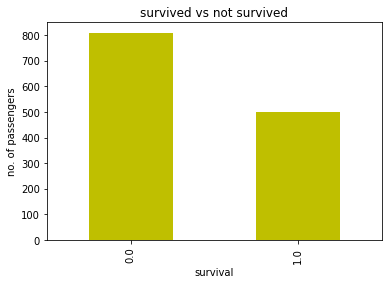

In [23]:
#visualising no. of people survived 
titanic_df['survived'].value_counts().plot.bar(color = 'y')   #bar plot
plt.title('survived vs not survived')
plt.xlabel('survival')
plt.ylabel('no. of passengers')
plt.show()

*we can see, more no. of people died than survived* 

###***pclass feature analysis***

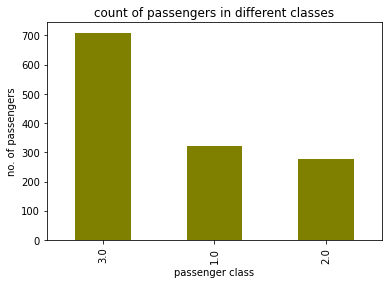

In [24]:
#visualising no. of passengers in different classes
titanic_df['pclass'].value_counts().plot.bar(color = 'olive')
plt.title('count of passengers in different classes')
plt.xlabel('passenger class')
plt.ylabel('no. of passengers')
plt.show()

*Most of the passengers belongs to 3rd class*

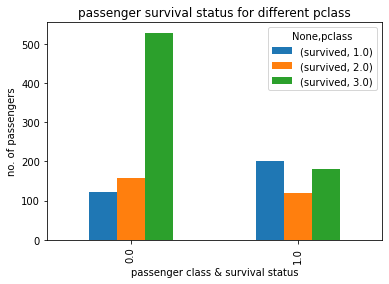

In [25]:
#visualising affect of pclass on survival
titanic_df.groupby(['survived','pclass']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival status for different pclass')
plt.xlabel('passenger class & survival status')
plt.ylabel('no. of passengers')
plt.show()

*We can see, only for 1st class more no. of people survived than died*

**Observations**

* *Passengers of 1st class was able to survive in comparison to other classes*
* *Most of the people belonged to 3rd class in titanic and only few people were able to survive from 3rd class*

*It might be possible that because people in 1st class belonged to high status family so they were given priority to escape and prevent themselves*

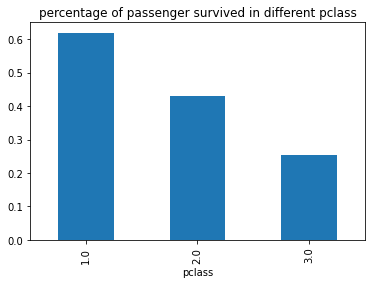

In [26]:
#percentage of people survived in different pclass
titanic_df['survived'].groupby(titanic_df['pclass']).mean().plot(kind='bar')
plt.title('percentage of passenger survived in different pclass')
plt.show()

In [27]:
#alternate approach for the above method
#pd.crosstab(titanic_df['survived'],titanic_df['pclass']).plot(kind='bar')

###***Sex feature analysis***

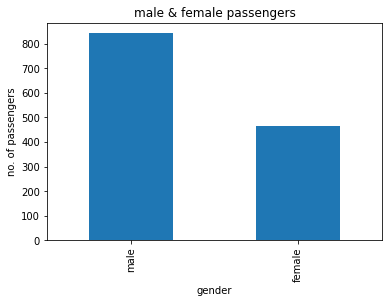

In [28]:
#visualising no. of people on gender basis
titanic_df['sex'].value_counts().plot.bar()
plt.title('male & female passengers')
plt.xlabel('gender')
plt.ylabel('no. of passengers')
plt.show()

*okay so, male passengers were more in comparison to female passengers*

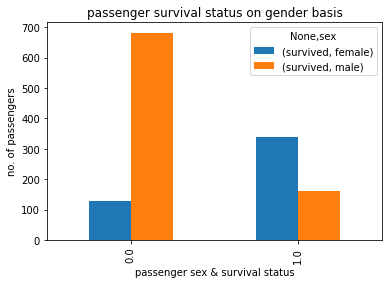

In [29]:
#visualising affect of gender on survival
titanic_df.groupby(['survived','sex']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival status on gender basis')
plt.xlabel('passenger sex & survival status')
plt.ylabel('no. of passengers')
plt.show()

**Observation**

* *Male passengers were more but females were given priority to escape from the ship*

###***Age feature analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


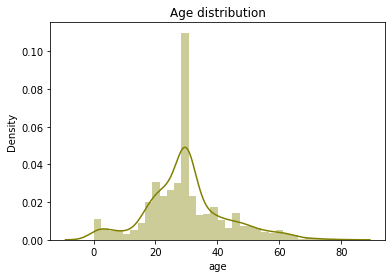

In [30]:
#visualising distribution of age feature
sns.distplot(titanic_df['age'], color = 'olive')
plt.title('Age distribution')
plt.show()

*Looks like most of the passengers in their 30s*

In [31]:
#grouping the passengers wrt age to create new feature age group
#defing a function for the same
def age_grp(x):
  if 0<= x <= 10:
    y = '0 to 10'
  if 10< x <= 20:
    y = '11 to 20'
  if 20< x <= 30:
    y = '21 to 30'
  if 30< x <= 40:
    y = '31 to 40' 
  if 40< x <= 50:
    y = '41 to 50'  
  if 50< x <= 60:
    y = '51 to 60'
  if 60< x <= 70:
    y = '61 to 70'  
  if 70< x :
    y = '70 above' 
  return y         

#creating a new feature age group
titanic_df['age group'] = titanic_df['age'].apply(age_grp)   

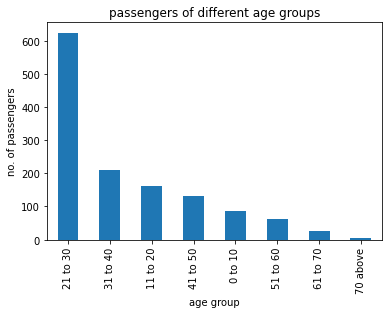

In [32]:
#visualising no. of passengers of different age groups
titanic_df['age group'].value_counts().plot.bar()
plt.title('passengers of different age groups')
plt.xlabel('age group')
plt.ylabel('no. of passengers')
plt.show()

*yes, most of the passengers are between 20 -30*

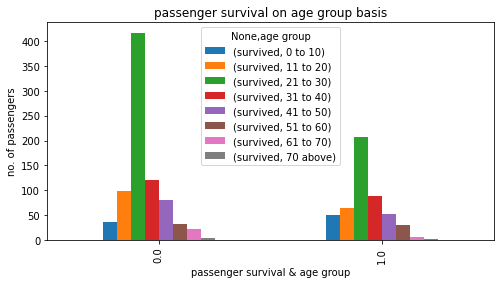

In [33]:
#visualising affect of age group on survival
plt.rcParams['figure.figsize'] = (8,4)   #defing figure size
titanic_df.groupby(['survived','age group']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival on age group basis')
plt.xlabel('passenger survival & age group')
plt.ylabel('no. of passengers')
plt.show()

*There are more no. of people who died than survived for each age group except the age group 0-10, may be children were on priority along wirth females to escape from the ship*

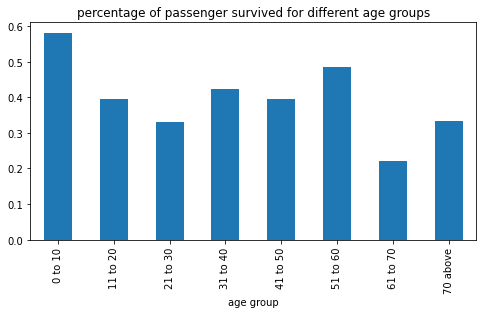

In [34]:
#percentage of people survived for different age groups
titanic_df['survived'].groupby(titanic_df['age group']).mean().plot(kind='bar')
plt.title('percentage of passenger survived for different age groups')
plt.show()

In [35]:
#dropping age column
titanic_df.drop(columns = 'age',inplace =True)

###***Fare feature analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


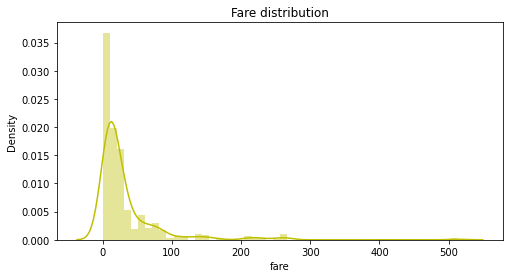

In [36]:
#visualising distribution of fare
sns.distplot(titanic_df['fare'], color = 'y')
plt.title('Fare distribution')
plt.show()

*Looks like most of the passengers has around 10-40 $ ticket fare, may be these people were belonging to 3rd class pclass*



*Let's group fare feature to create new feature ticket fare groups*

In [37]:
#defining a function to group passengers on the basis of ticket fare
def ticket_fare(x):
  if 0 <=x<30:
    return 'between 0 to 30'
  if 30 <=x<80:
    return 'between 30 to 80'
  if 80 <=x<150:
    return 'between 80 to 150'
  if 150 <=x<250:
    return 'between 150 to 250'
  if 250 <=x:
    return '250 above'    

#creating new feature ticket fare group
titanic_df['ticket fare group'] = titanic_df['fare'].apply(ticket_fare)         


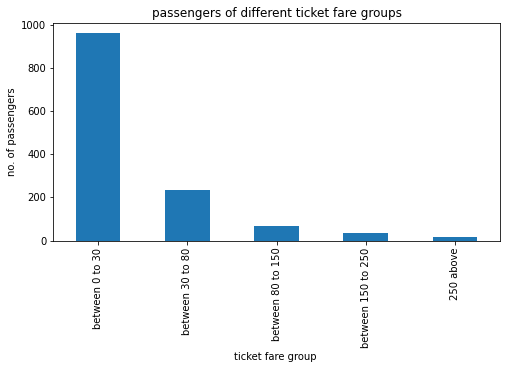

In [38]:
#visualising no. of passengers of different ticket fare groups
titanic_df['ticket fare group'].value_counts().plot.bar()
plt.title('passengers of different ticket fare groups')
plt.xlabel('ticket fare group ')
plt.ylabel('no. of passengers')
plt.show()

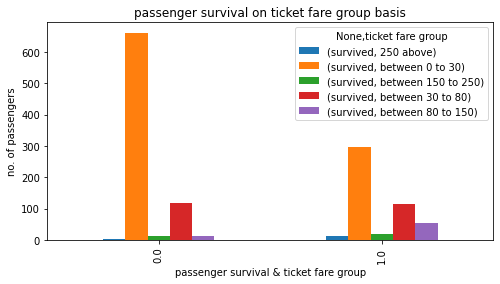

In [39]:
#visualising affect of ticket fare groups on survival
titanic_df.groupby(['survived','ticket fare group']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival on ticket fare group basis')
plt.xlabel('passenger survival & ticket fare group')
plt.ylabel('no. of passengers')
plt.show()

*passengers with lowest ticket fares were died the most*

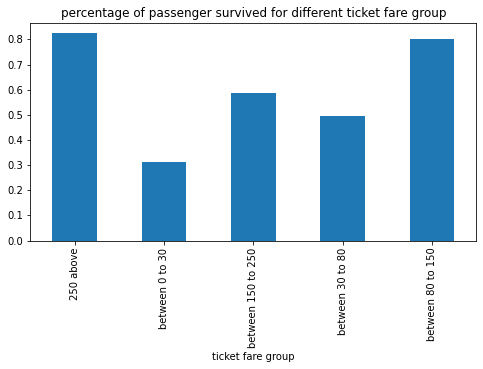

In [40]:
#percentage of people survived for different ticket fare group
titanic_df['survived'].groupby(titanic_df['ticket fare group']).mean().plot(kind='bar')
plt.title('percentage of passenger survived for different ticket fare group')
plt.show()

In [41]:

#dropping fare column
titanic_df.drop(columns = 'fare',inplace =True)

###***Embarked feature analysis***

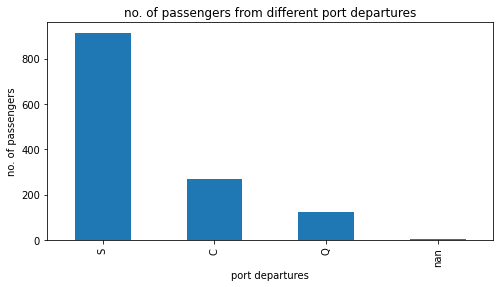

In [42]:
#visualising counts of different port depature places
titanic_df['embarked'].value_counts().plot.bar()
plt.title('no. of passengers from different port departures')
plt.xlabel('port departures')
plt.ylabel('no. of passengers')
plt.show()

*Most of the passengers were from S = Southampton*

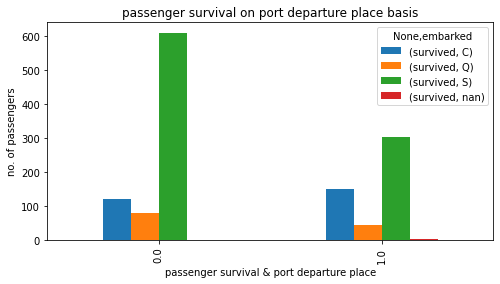

In [43]:
#visualising affect on survival on port departure place basis
titanic_df.groupby(['survived','embarked']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival on port departure place basis')
plt.xlabel('passenger survival & port departure place')
plt.ylabel('no. of passengers')
plt.show()

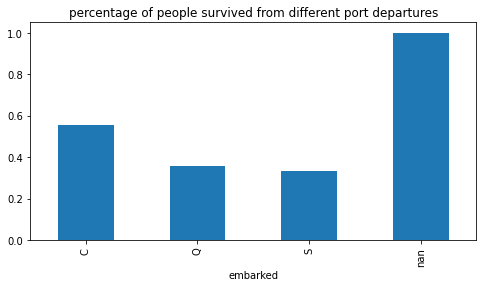

In [44]:
#percentage of passenger survived from different port departures
titanic_df['survived'].groupby(titanic_df['embarked']).mean().plot(kind='bar')
plt.title('percentage of people survived from different port departures')
plt.show()

###***Social status feature analysis***

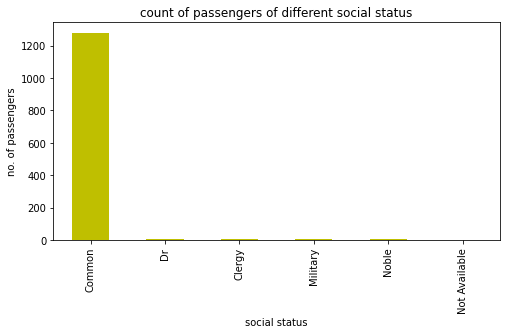

In [45]:
#visualising no. of passengers of different social status 
titanic_df['social status'].value_counts().plot.bar(color = 'y')
plt.title('count of passengers of different social status')
plt.xlabel('social status')
plt.ylabel('no. of passengers')
plt.show()

*Most of the passengers were from common social background*

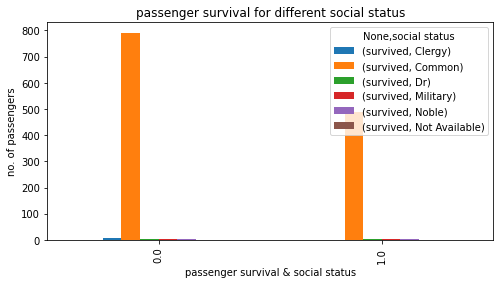

In [46]:
#visualising affect of social status on survival
titanic_df.groupby(['survived','social status']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival for different social status')
plt.xlabel('passenger survival & social status')
plt.ylabel('no. of passengers')
plt.show()

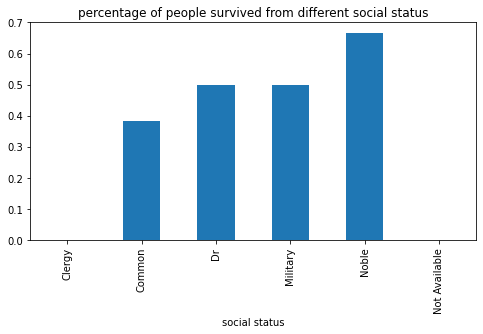

In [47]:
#percentage of passenger survived from different social status
titanic_df['survived'].groupby(titanic_df['social status']).mean().plot(kind='bar')
plt.title('percentage of people survived from different social status')
plt.show()

*If a passenger is noble, there were high chances to survive*

###***Deck feature analysis***

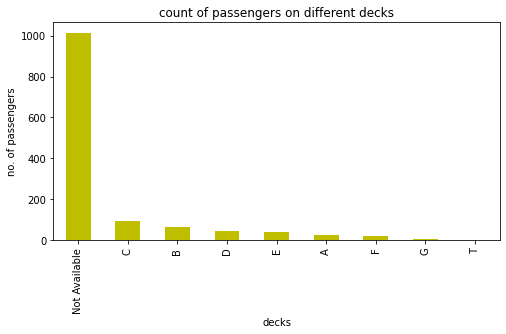

In [48]:
#visualising no. of passengers in different decks
titanic_df['deck'].value_counts().plot.bar(color = 'y')
plt.title('count of passengers on different decks')
plt.xlabel('decks')
plt.ylabel('no. of passengers')
plt.show()

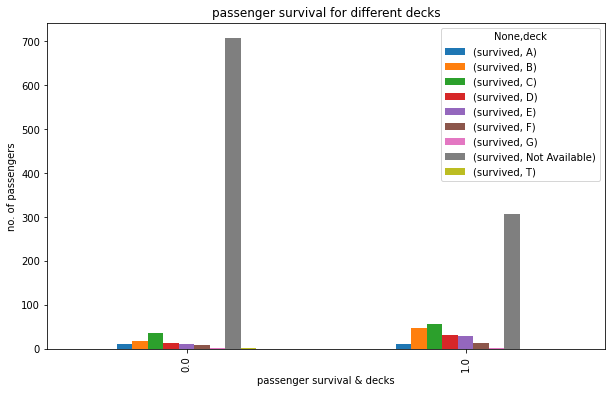

In [49]:
#visualising affect of deck on survival
plt.rcParams['figure.figsize'] = (10,6)
titanic_df.groupby(['survived','deck']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival for different decks')
plt.xlabel('passenger survival & decks')
plt.ylabel('no. of passengers')
plt.show()

*Does not seem to be any special affect of deck on survival status*

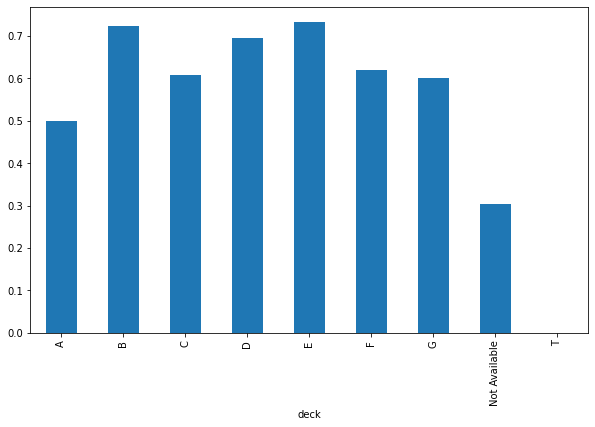

In [50]:

titanic_df['survived'].groupby(titanic_df['deck']).mean().plot(kind='bar')

###***Family members feature analysis***

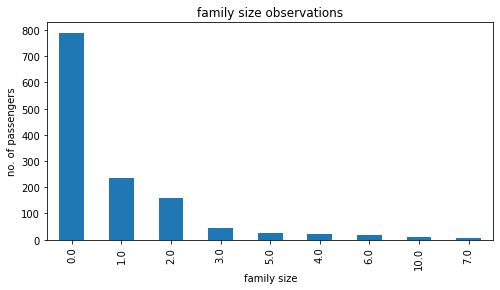

In [51]:
#visualising passengers family size
plt.rcParams['figure.figsize'] = (8,4)
titanic_df['family_members'].value_counts().plot.bar()
plt.title('family size observations')
plt.xlabel('family size')
plt.ylabel('no. of passengers')
plt.show()

*Mostly passengers were alone, without family*

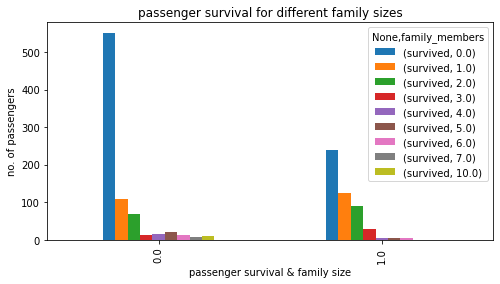

In [52]:
#visualising affect of family size on survival
titanic_df.groupby(['survived','family_members']).agg({'survived':'count'}).unstack().plot.bar()   #bar plot
plt.title('passenger survival for different family sizes')
plt.xlabel('passenger survival & family size')
plt.ylabel('no. of passengers')
plt.show()

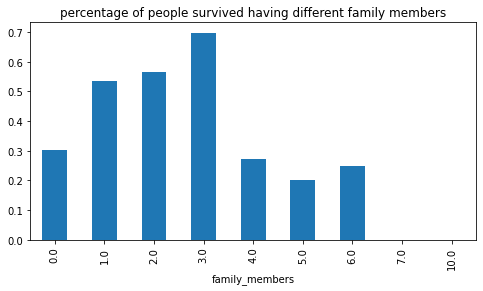

In [53]:
#percentage of passenger survived having different family members
titanic_df['survived'].groupby(titanic_df['family_members']).mean().plot(kind='bar')
plt.title('percentage of people survived having different family members')
plt.show()

##***Predictive Modelling***

In [54]:
#creating a copy of the dataframe
titanic = titanic_df.copy()

In [55]:
#looking at first few observations
titanic.head()

,pclass,sex,embarked,survived,social status,deck,family_members,age group,ticket fare group
0,1.0,female,S,1.0,Common,B,0.0,21 to 30,between 150 to 250
1,1.0,male,S,1.0,Common,C,3.0,0 to 10,between 150 to 250
2,1.0,female,S,0.0,Common,C,3.0,0 to 10,between 150 to 250
3,1.0,male,S,0.0,Common,C,3.0,21 to 30,between 150 to 250
4,1.0,female,S,0.0,Common,C,3.0,21 to 30,between 150 to 250


***Encoding***

In [56]:
#lloking for the basic information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pclass             1309 non-null   float64
 1   sex                1309 non-null   object 
 2   embarked           1309 non-null   object 
 3   survived           1309 non-null   float64
 4   social status      1309 non-null   object 
 5   deck               1309 non-null   object 
 6   family_members     1309 non-null   float64
 7   age group          1309 non-null   object 
 8   ticket fare group  1309 non-null   object 
dtypes: float64(3), object(6)
memory usage: 92.2+ KB


In [57]:
#looking for different values of social status column
titanic['social status'].unique()

array(['Common', 'Military', 'Dr', 'Not Available', 'Noble', 'Clergy'],
      dtype=object)

In [58]:
#defing a function to do ordinal encoding of family members feature
def family_size(x):
  if x in [1.0, 2.0, 3.0]:
    return 2
  if x in [0.0, 4.0, 5.0, 6.0]:
    return 1
  if x in [7.0, 10.0]:
    return 0   

In [59]:
##ordinal encoding 

#pclass feature
titanic['pclass'] = titanic['pclass'].map({1.0:3, 2.0:2, 3.0 :1})

#sex feature
titanic['sex'] = titanic['sex'].map({'female':1, 'male':0})

#social status feature
titanic['social status']=titanic['social status'].str.strip()
titanic['social status'] = titanic['social status'].map({'Clergy':1, 'Common':2,'Dr':3, 'Military':4, 'Noble':5, 'Not Available': 0})

#family members feature
titanic['family_members'] =  titanic['family_members'].apply(family_size)   

#age group feature
titanic['age group'] = titanic['age group'].map({'0 to 10':7, '51 to 60':6, '31 to 40':5, '41 to 50':4, '11 to 20': 4,'21 to 30':3, '61 to 70':2, '70 above':1})

#ticket fare group feature
titanic['ticket fare group'] = titanic['ticket fare group'].map({'between 0 to 30':0, 'between 30 to 80':1, 'between 80 to 150':3, 'between 150 to 250':2, '250 above': 3})


In [60]:
#one hot coding for embarked and deck features
dummies_train = pd.get_dummies(titanic[['deck','embarked']],drop_first = True)

In [61]:
#dropping columns
titanic.drop(columns = ['deck','embarked'],inplace = True)

In [62]:
#concatenating dataframes
titanic = pd.concat([titanic, dummies_train], axis =1) 

In [63]:
#categorising dependent and independent variables
dep_var = ['survived']
ind_var = list(set(titanic.columns.tolist()) - set(dep_var))

In [64]:
#distributing input and output variables
x = titanic[ind_var]
y = titanic['survived']

In [65]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)